### Importing basic libraries: Numpy and Pandas

In [2]:
import numpy as np
import pandas as pd

### Reading the [Open Psychometrics](https://www.kaggle.com/tunguz/big-five-personality-test) dataset

Please download the dataset from Kaggle using this link: [Dataset Download](https://www.kaggle.com/datasets/tunguz/big-five-personality-test)

Once downloaded, place the csv dataset 'data-final.csv' on this folder 'industry_projects/personality-prediction/' or in the same folder where .ipynb file is located.

In [20]:
data_raw = pd.read_csv("data-final.csv",sep='\t')
print("Raw Data Shape : ", data_raw.shape)
data_raw.head()

Raw Data Shape :  (1015341, 110)


,EXT1,EXT2,EXT3,EXT4,EXT5,...,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,...,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,...,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,...,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,...,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,...,17,2,KE,1.0,38.0


### Dropping some columns out of 110 columns

In [6]:
data = data_raw.copy()
pd.options.display.max_columns = 150
data.drop(data.columns[50:107], axis=1, inplace=True)
data.drop(data.columns[51:], axis=1, inplace=True)
print('Number of participants: ', len(data))
data.head()

Number of participants:  1015341


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE


### Mentioning Dictionaries representing the exact quests per column asked

In [7]:
ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention'}

est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                 'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}

agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule'}

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'}

# Group Names and Columns
EXT = [column for column in data if column.startswith('EXT')]
EST = [column for column in data if column.startswith('EST')]
AGR = [column for column in data if column.startswith('AGR')]
CSN = [column for column in data if column.startswith('CSN')]
OPN = [column for column in data if column.startswith('OPN')]

### Visualize the questions and their distribution

In [8]:
from matplotlib import pyplot as plt
def vis_questions(groupname, questions, color):
    plt.figure(figsize=(60,60))
    for i in range(0,9):
        plt.subplot(10,3,i+1)
        plt.hist(data[groupname[i]], bins=20, color= color, alpha=.5)
        plt.title(questions[groupname[i]], fontsize=38)

Matplotlib created a temporary config/cache directory at /var/folders/w1/ddjn79r10gb30q27xq0t_fjw0000gn/T/matplotlib-7yq2quyf because the default path (/Users/ravishkumar/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


Q&As Related to Conscientious Personality


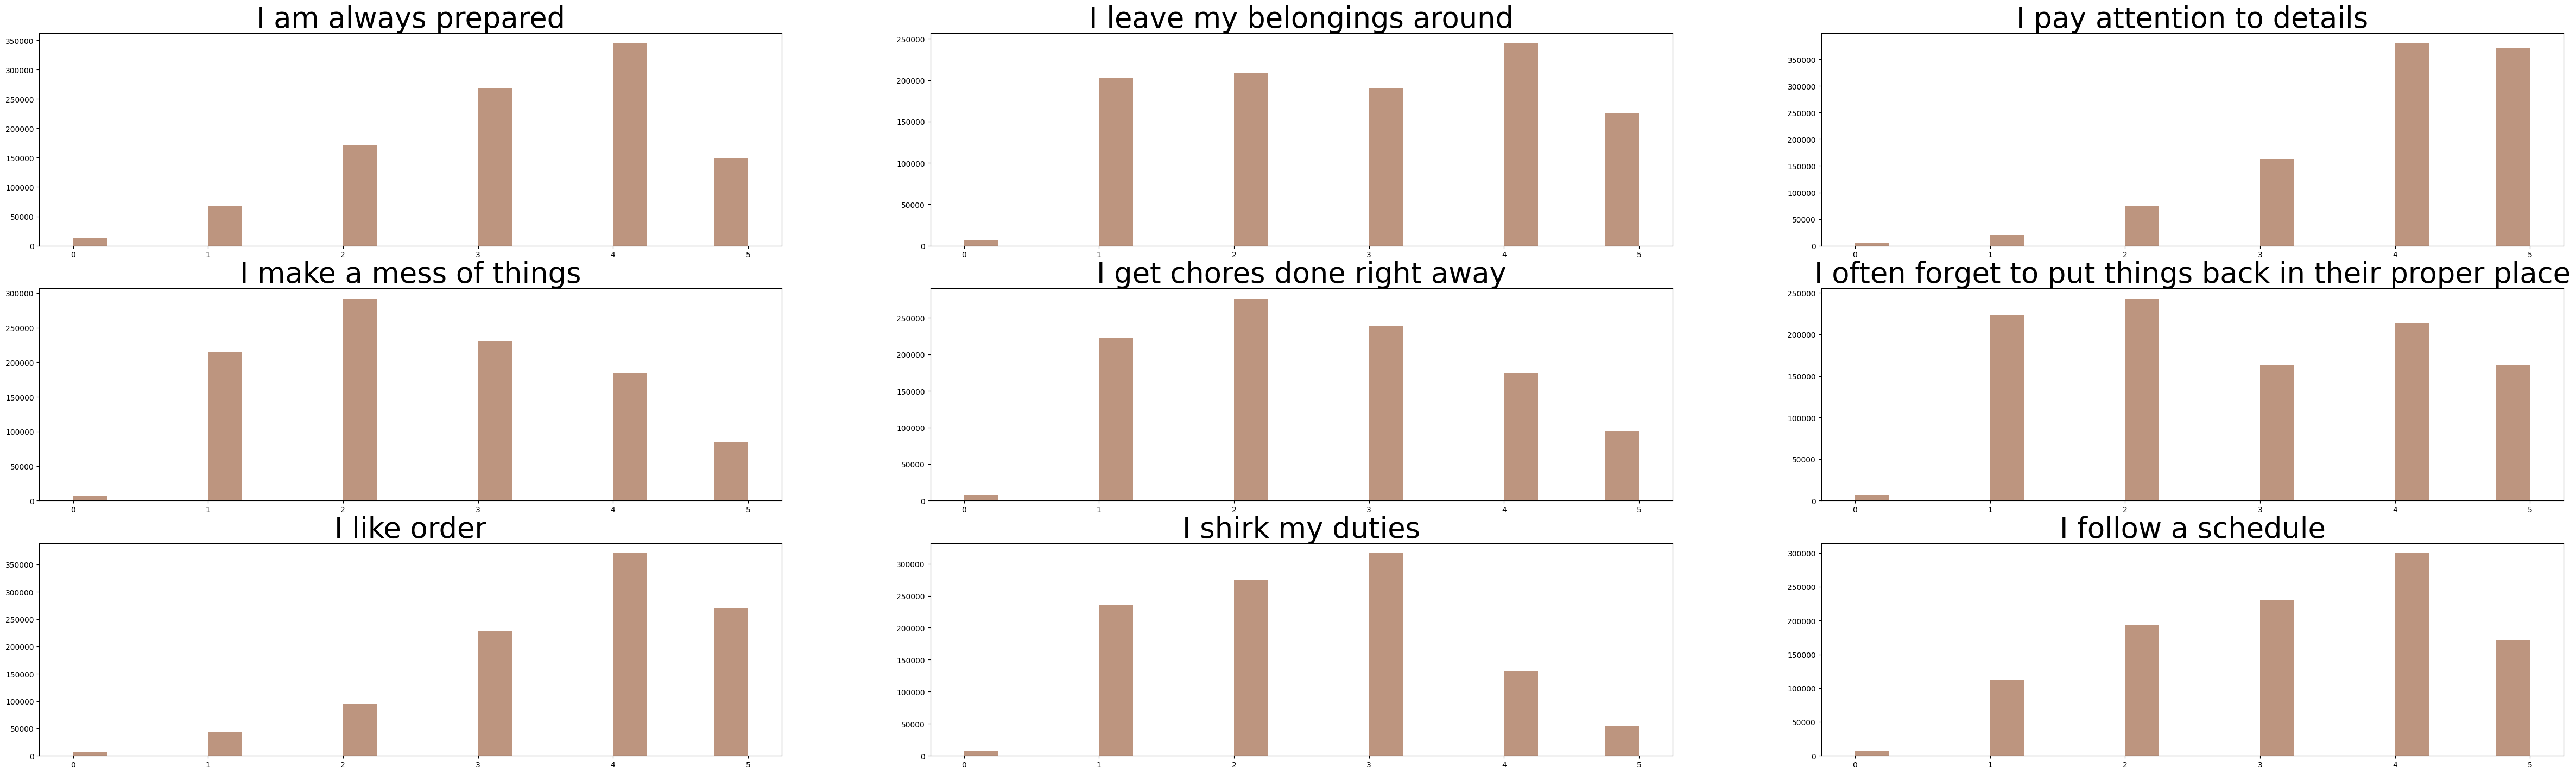

In [9]:
print('Q&As Related to Conscientious Personality')
vis_questions(CSN, csn_questions, '#7C2D00')

### Checking the data distribution as per the different personalities present in the dataset

Q&As Related to Extroversion Personality


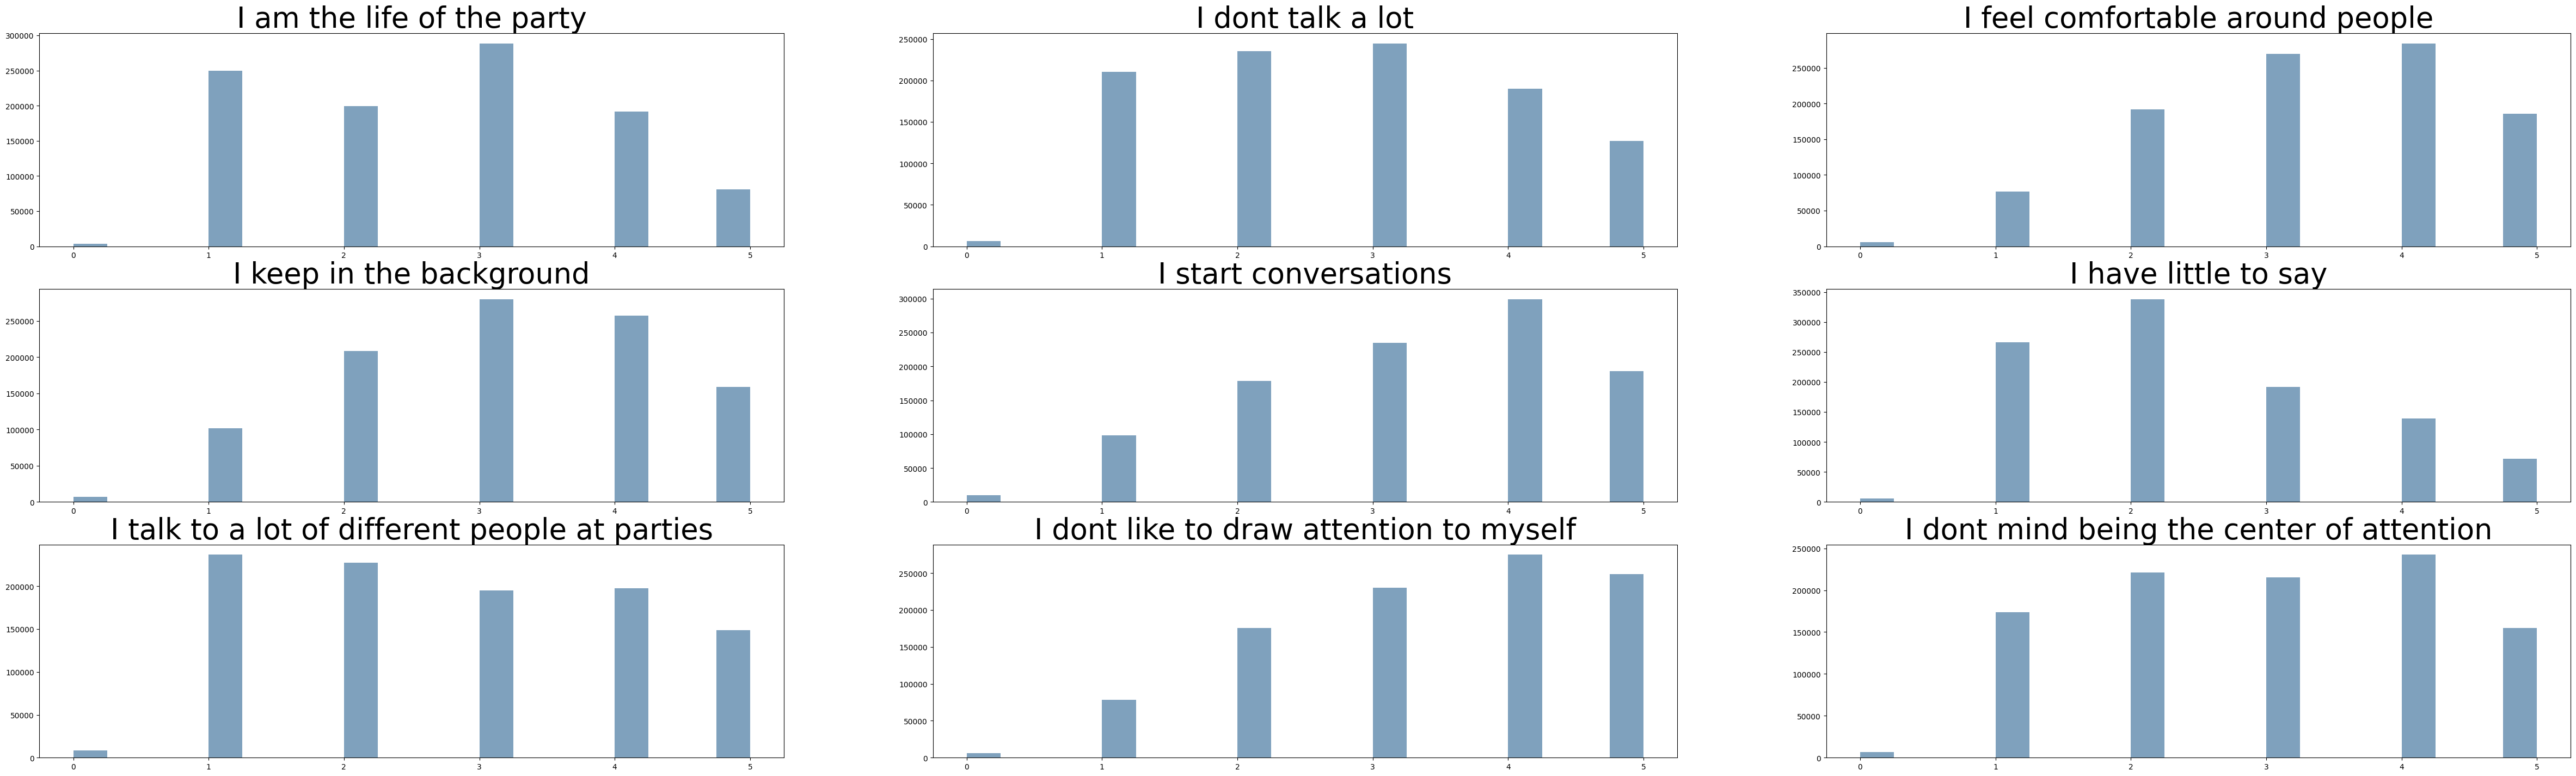

In [11]:
print('Q&As Related to Extroversion Personality')
vis_questions(EXT, ext_questions, '#00447C')

### Scaling the dataset as we know that the [k-means](https://www.enjoyalgorithms.com/blog/k-means-clustering-algorithm/) algorithm is highly dependent on scaling features.

In [12]:
# For ease of calculation lets scale all the values between 0-1 and take a sample of 5000 
from sklearn.preprocessing import MinMaxScaler

df = data.drop('country', axis=1)
columns = list(df.columns)

scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=columns)
# This (scaler ) is created just for sake of ease of calculation for clustering 
df_sample = df[:5000]

### Elbow plot to check the number of clusters to form from the k-means algorithm

We already know that there are 5 personlaities, but we can anytime cross-verify to get a slight hint on this.

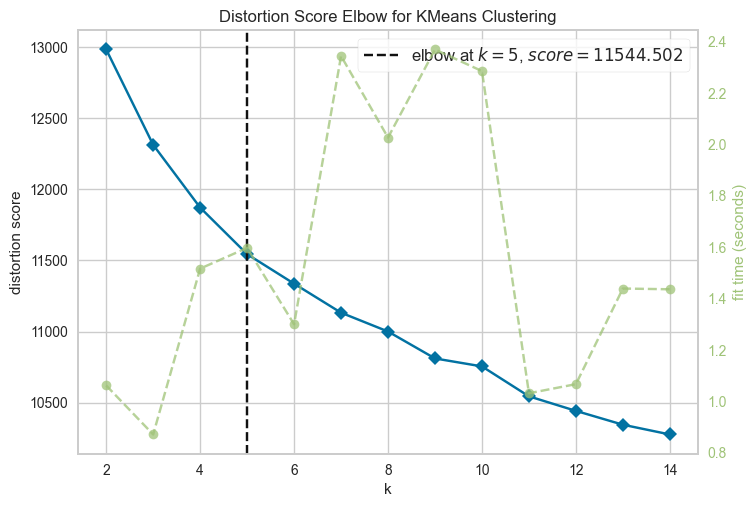

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
# Visualize the elbow
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,15))
visualizer.fit(df_sample)
visualizer.poof()

### Fitting the Unsupervised k-means model on the dataset to form 5 clusters

In [15]:
# Creating K-means Cluster Model
from sklearn.cluster import KMeans

# I use the unscaled data but without the country column
df_model = data.drop('country', axis=1)

# I define 5 clusters and fit my model
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df_sample)

### Predicting the performance of the trained k-means model on the test dataset

In [16]:
# Predicting the Clusters
pd.options.display.max_columns = 10

#labels_ is used to identify Labels of each point
predictions = k_fit.labels_
df_sample['Clusters'] = predictions
df_sample.head(10)

/var/folders/w1/ddjn79r10gb30q27xq0t_fjw0000gn/T/ipykernel_11602/667753592.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['Clusters'] = predictions


,EXT1,EXT2,EXT3,EXT4,EXT5,...,OPN7,OPN8,OPN9,OPN10,Clusters
0,0.8,0.2,1.0,0.4,1.0,...,1.0,0.6,0.8,1.0,4
1,0.6,1.0,0.6,0.8,0.6,...,0.8,0.4,1.0,0.6,3
2,0.4,0.6,0.8,0.8,0.6,...,1.0,0.6,0.8,0.8,3
3,0.4,0.4,0.4,0.6,0.8,...,0.8,0.8,0.6,0.6,0
4,0.6,0.6,0.6,0.6,1.0,...,1.0,0.6,1.0,1.0,4
5,0.6,0.6,0.8,0.4,0.8,...,1.0,0.8,1.0,0.4,4
6,0.8,0.6,0.8,0.6,0.6,...,1.0,1.0,0.8,0.8,1
7,0.6,0.2,1.0,0.4,1.0,...,0.8,0.6,0.8,1.0,4
8,0.4,0.4,0.6,0.6,0.8,...,1.0,0.4,1.0,1.0,1
9,0.2,1.0,0.6,1.0,0.4,...,0.8,0.6,0.6,0.6,0


### Let's visualize the prediction performance to see how good model got trained.

We have 51 columns and there is no method to plot more than three columns. Hence, we need to reduce the dimensionality first, and for that we will ise [Principal Component Analysis (PCA)](https://www.enjoyalgorithms.com/blog/principal-component-analysis-in-ml/)

In [17]:
# In order to visualize in 2D graph I will use PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_sample)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca.head()

,PCA1,PCA2,Clusters
0,-1.957025,-0.908921,4
1,-0.988324,0.498710,3
2,-0.951832,0.191567,3
3,2.129268,-0.229610,0
4,-2.165979,-0.262678,4


### Ploting the clusters for reduced 2-dimesnional data

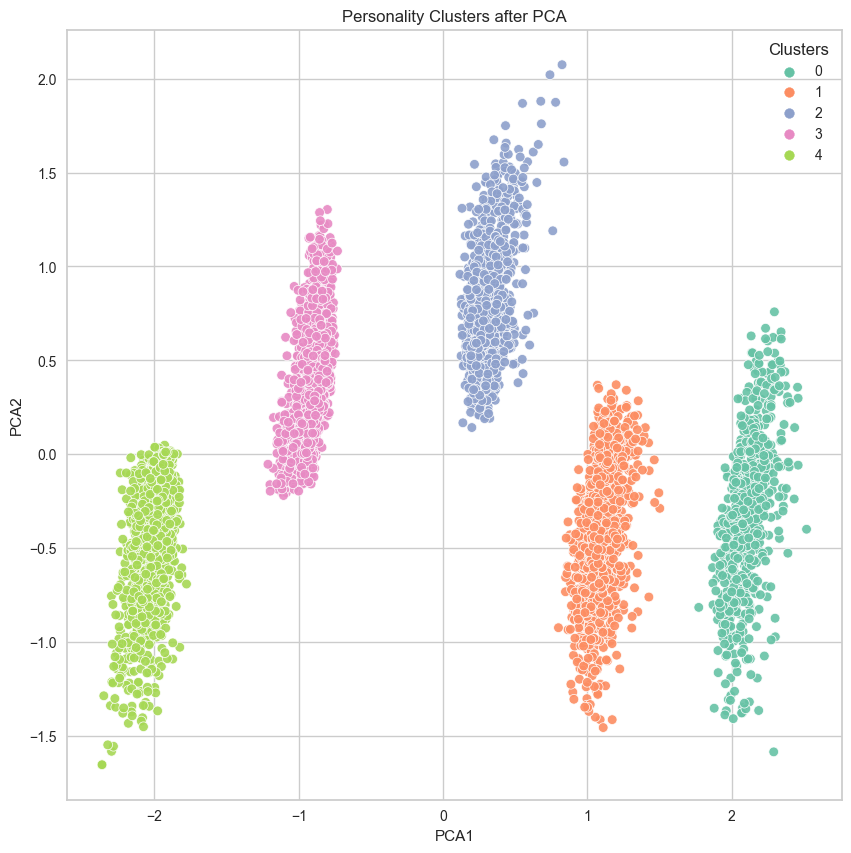

In [19]:
import seaborn as sns

plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.9)
plt.title('Personality Clusters after PCA');